# EGCI 305: Chapter 8 (ANOVA)

Outline
> 1. [Packages](#ch8_packages)

> 2. [One-way randomized ANOVA (statsmodels)](#ch8_anova_randomized)
>    - [Example: compression strength](#ch8_ex_compression)
>    - [Example: sulfur content](#ch8_ex_sulfur)

> 3. [Studentized range (Q) distribution (scipy)](#ch8_studentized)
> 4. [Pairwise Tukey HSD (statsmodels)](#ch8_tukey)
>    - [Example: compression strength, post-hoc test](#ch8_ex_compression_posthoc)
>    - [Example: sulfur content, post-hoc test](#ch8_ex_sulfur_posthoc)

Functions
> - [summarize, qqPlot](#ch8_func_summarize)

<a name="ch8_packages"></a>

## Packages
> - **numpy** -- to work with array manipulation
> - **matplotlib** -- to work with visualization (backend)
> - **seaborn** -- to work with high-level visualization
> - **math** -- to work with calculation such as sqrt (if not using sympy)
> - **scipy.stats** -- to work with stat
> - **statsmodels.stats.oneway** -- to work with ANOVA
> - **statsmodels.stats.multicomp** -- to work with post-hoc test

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("Numpy version =", np.version.version)
print("Seaborn version =", sns.__version__)

import math
import scipy
print("Scipy version =", scipy.__version__)

from scipy import stats
from scipy.stats import f                                     # F distribution
from scipy.stats import levene                                # Levene test
from scipy.stats import studentized_range                     # Q distribution
from statsmodels.stats.oneway     import anova_oneway         # ANOVA
from statsmodels.stats.multicomp  import pairwise_tukeyhsd    # post-hoc test

Numpy version = 1.24.3
Seaborn version = 0.12.2
Scipy version = 1.11.1


<a name="ch8_anova_randomized"></a>

## One-way Randomized ANOVA (statsmodels)
- Apply Levene test for homogeniety of variances first --> **[Manual: scipy.stats.levene](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html)**
- **[Manual: statsmodels.stats.oneway.anova_oneway](https://www.statsmodels.org/dev/generated/statsmodels.stats.oneway.anova_oneway.html)**

<a name="ch8_ex_compression"></a>

### Example : compression strength
- Hypothesis
    >- H<sub>0</sub> : $\mu$<sub>i</sub> = $\mu$<sub>j</sub> ; for all i and j
    >- H<sub>1</sub> : $\mu$<sub>i</sub> $\ne$ $\mu$<sub>j</sub> ; for some i and j
    >- i, j = 1, 2, 3, 4

<a name="ch8_func_summarize"></a>
### Functions : summarize, qqPlot

In [18]:
def summarize(data, groupname):
    print(groupname, ">> sample size = %d, mean = %.2f, var = %.2f" % 
                     (data.size, data.mean(), data.var(ddof=1))
     )

In [20]:
def qqPlot(plotindex, data, groupname):
    ax = plt.subplot(plotindex)
    stats.probplot(data1, dist = 'norm', plot = ax)
    ax.set_title(groupname)

box1 >> sample size = 6, mean = 713.00, var = 2166.95
box2 >> sample size = 6, mean = 756.93, var = 1626.95
box3 >> sample size = 6, mean = 698.07, var = 1383.96
box4 >> sample size = 6, mean = 562.02, var = 1589.93


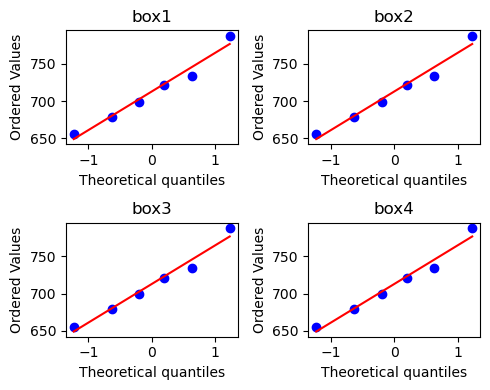

In [22]:
data1  = np.array( [655.5, 788.3, 734.3, 721.4, 679.1, 699.4] )
group1 = np.full(data1.size, "box1")

data2  = np.array( [789.2, 772.5, 786.9, 686.1, 732.1, 774.8] )
group2 = np.full(data2.size, "box2")

data3  = np.array( [737.1, 639.0, 696.3, 671.7, 717.2, 727.1] )
group3 = np.full(data3.size, "box3")

data4  = np.array( [535.1, 628.7, 542.4, 559.0, 586.9, 520.0] )
group4 = np.full(data4.size, "box4")

dataAll  = np.concatenate( (data1, data2, data3, data4) )
groupAll = np.concatenate( (group1, group2, group3, group4) )

###------------------------------------------------------------
summarize(data1, "box1")
summarize(data2, "box2")
summarize(data3, "box3")
summarize(data4, "box4")

###------------------------------------------------------------
fig = plt.figure( figsize = (5,4) ) 
qqPlot(221, data1, "box1")
qqPlot(222, data2, "box2")
qqPlot(223, data3, "box3")
qqPlot(224, data4, "box4")
fig.tight_layout()
plt.show() 

In [23]:
result_vartest = levene(data1, data2, data3, data4)
print("Levene statistic = %.4f" % result_vartest.statistic)
print("P-value          = %.4f" % result_vartest.pvalue)

Levene statistic = 0.0996
P-value          = 0.9593


In [24]:
result = anova_oneway(dataAll, groupAll, use_var = 'equal')
print("Calculated f = %.2f" % result.statistic)
print("P-value      = %.4f" % result.pvalue)
print("df           =", result.df)

print("\n----- All details -----")
print(result)

print("\n----- Rejection region -----")
fthreshold = f.ppf(1-0.05, 3, 20)
print("F threshold = %.2f" % fthreshold)

Calculated f = 25.09
P-value      = 0.0000
df           = (3.0, 20.0)

----- All details -----
statistic = 25.094289367676012
pvalue = 5.525449877817101e-07
df = (3.0, 20.0)
df_num = 3.0
df_denom = 20.0
nobs_t = 24.0
n_groups = 4
means = [713.         756.93333333 698.06666667 562.01666667]
nobs = [6. 6. 6. 6.]
vars_ = [2166.952      1626.94666667 1383.96266667 1589.93366667]
use_var = equal
welch_correction = True
tuple = (25.094289367676012, 5.525449877817101e-07)

----- Rejection region -----
F threshold = 3.10


<a name="ch8_ex_sulfur"></a>

### Example : sulfur content
- Hypothesis
    >- H<sub>0</sub> : $\mu$<sub>i</sub> = $\mu$<sub>j</sub> ; for all i and j
    >- H<sub>1</sub> : $\mu$<sub>i</sub> $\ne$ $\mu$<sub>j</sub> ; for some i and j
    >- i, j = 1, 2, 3, 4, 5

seam1 >> sample size = 7, mean = 1.66, var = 0.18
seam2 >> sample size = 8, mean = 1.17, var = 0.14
seam3 >> sample size = 9, mean = 1.46, var = 0.11
seam4 >> sample size = 8, mean = 0.88, var = 0.12
seam5 >> sample size = 10, mean = 0.88, var = 0.07


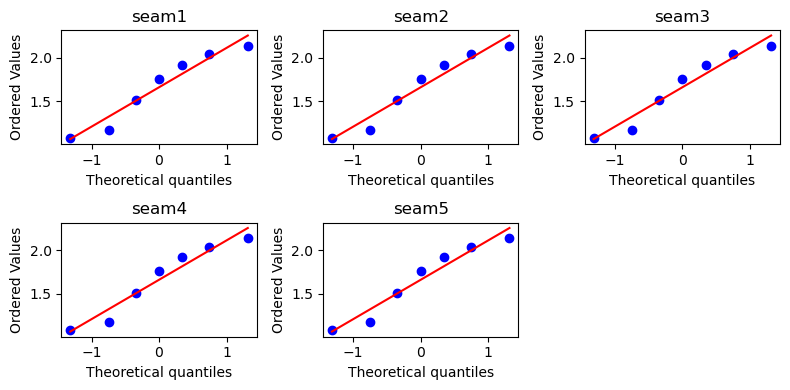

In [29]:
data1  = np.array( [1.51, 1.92, 1.08, 2.04, 2.14, 1.76, 1.17] )
group1 = np.full(data1.size, "seam1")

data2  = np.array( [1.69, 0.64, 0.90, 1.41, 1.01, 0.84, 1.28, 1.59] )
group2 = np.full(data2.size, "seam2")

data3  = np.array( [1.56, 1.22, 1.32, 1.39, 1.33, 1.54, 1.04, 2.25, 1.49] )
group3 = np.full(data3.size, "seam3")

data4  = np.array( [1.30, 0.75, 1.26, 0.69, 0.62, 0.90, 1.20, 0.32] )
group4 = np.full(data4.size, "seam4")

data5  = np.array( [0.73, 0.80, 0.90, 1.24, 0.82, 0.72, 0.57, 1.18, 0.54, 1.30] )
group5 = np.full(data5.size, "seam5")

dataAll  = np.concatenate( (data1, data2, data3, data4, data5) )
groupAll = np.concatenate( (group1, group2, group3, group4, group5) )

###------------------------------------------------------------
summarize(data1, "seam1")
summarize(data2, "seam2")
summarize(data3, "seam3")
summarize(data4, "seam4")
summarize(data5, "seam5")

###------------------------------------------------------------
fig = plt.figure( figsize = (8,4) ) 
qqPlot(231, data1, "seam1")
qqPlot(232, data2, "seam2")
qqPlot(233, data3, "seam3")
qqPlot(234, data4, "seam4")
qqPlot(235, data5, "seam5")
fig.tight_layout()
plt.show() 

In [31]:
result_vartest = levene(data1, data2, data3, data4, data5)
print("Levene statistic = %.4f" % result_vartest.statistic)
print("P-value          = %.4f" % result_vartest.pvalue)

Levene statistic = 0.6949
P-value          = 0.6003


In [33]:
result = anova_oneway(dataAll, groupAll, use_var = 'equal')
print("Calculated f = %.2f" % result.statistic)
print("P-value      = %.4f" % result.pvalue)
print("df           =", result.df)

print("\n----- All details -----")
print(result)

print("\n----- Rejection region -----")
fthreshold = f.ppf(1-0.01, 4, 37)
print("F threshold = %.2f" % fthreshold)

Calculated f = 8.09
P-value      = 0.0001
df           = (4.0, 37.0)

----- All details -----
statistic = 8.094810296811628
pvalue = 8.566217180148503e-05
df = (4.0, 37.0)
df_num = 4.0
df_denom = 37.0
nobs_t = 42.0
n_groups = 5
means = [1.66 1.17 1.46 0.88 0.88]
nobs = [ 7.  8.  9.  8. 10.]
vars_ = [0.17523333 0.14354286 0.1146     0.12254286 0.07402222]
use_var = equal
welch_correction = True
tuple = (8.094810296811628, 8.566217180148503e-05)

----- Rejection region -----
F threshold = 3.87


<a name="ch8_studentized"></a>

## Studentized Range (Q) Distribution (scipy)
- **[Manual: scipy.stats.studentized_range](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.studentized_range.html)**
    > - For Q<sub>(df1)(df2)</sub>
    > - df1 = K = number of groups
    > - df2 = N-K
    > - Default loc = 0
    > - Default scale = 1

<a name="ch8_tukey"></a>

## Pairwise Tukey HSD (statsmodels)
- **[Manual: statsmodels.stats.multicomp.pairwise_tukeyhsd](https://www.statsmodels.org/dev/generated/statsmodels.stats.multicomp.pairwise_tukeyhsd.html)**

<a name="ch8_ex_compression_posthoc"></a>

### Example : compression strength, post-hoc test

In [38]:
### Re-load data to dataAll and groupAll fist

result_pairwise = pairwise_tukeyhsd(dataAll, groupAll, 0.05)
print(result_pairwise)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
 seam1  seam2    -0.49 0.0706 -1.0073  0.0273  False
 seam1  seam3     -0.2 0.7853 -0.7037  0.3037  False
 seam1  seam4    -0.78  0.001 -1.2973 -0.2627   True
 seam1  seam5    -0.78 0.0005 -1.2725 -0.2875   True
 seam2  seam3     0.29 0.4394 -0.1956  0.7756  False
 seam2  seam4    -0.29  0.468 -0.7897  0.2097  False
 seam2  seam5    -0.29 0.4151 -0.7641  0.1841  False
 seam3  seam4    -0.58 0.0125 -1.0656 -0.0944   True
 seam3  seam5    -0.58 0.0073 -1.0392 -0.1208   True
 seam4  seam5      0.0    1.0 -0.4741  0.4741  False
----------------------------------------------------


**Note that** 
> - In our slide, means are sorted first --> meandiff can only be positive.
> - But Python doesn't sort means before calculating meandiff --> meandiff can be both positive & negative.
> - To avoid confusion, read only the last column from Python's result.

In [41]:
### Find Q threshold

qthreshold = studentized_range.ppf(1-0.05, 4, 20)
print("Q threshold = %.2f" % qthreshold)

Q threshold = 3.96


<a name="ch8_ex_sulfur_posthoc"></a>

### Example : sulfur content, post-hoc test

In [44]:
### Re-load data to dataAll and groupAll fist

print("\n----- At alpha = 0.05 -----\n")
result_pairwise = pairwise_tukeyhsd(dataAll, groupAll, 0.05)
print(result_pairwise)

qthreshold = studentized_range.ppf(1-0.05, 5, 37)
print("Q threshold = %.2f" % qthreshold)


----- At alpha = 0.05 -----

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
 seam1  seam2    -0.49 0.0706 -1.0073  0.0273  False
 seam1  seam3     -0.2 0.7853 -0.7037  0.3037  False
 seam1  seam4    -0.78  0.001 -1.2973 -0.2627   True
 seam1  seam5    -0.78 0.0005 -1.2725 -0.2875   True
 seam2  seam3     0.29 0.4394 -0.1956  0.7756  False
 seam2  seam4    -0.29  0.468 -0.7897  0.2097  False
 seam2  seam5    -0.29 0.4151 -0.7641  0.1841  False
 seam3  seam4    -0.58 0.0125 -1.0656 -0.0944   True
 seam3  seam5    -0.58 0.0073 -1.0392 -0.1208   True
 seam4  seam5      0.0    1.0 -0.4741  0.4741  False
----------------------------------------------------
Q threshold = 4.05


In [46]:
print("\n----- At alpha = 0.01 -----\n")
result_pairwise = pairwise_tukeyhsd(dataAll, groupAll, 0.01)
print(result_pairwise)

qthreshold = studentized_range.ppf(1-0.01, 5, 37)
print("Q threshold = %.2f" % qthreshold)


----- At alpha = 0.01 -----

Multiple Comparison of Means - Tukey HSD, FWER=0.01 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
 seam1  seam2    -0.49 0.0706 -1.1227  0.1427  False
 seam1  seam3     -0.2 0.7853  -0.816   0.416  False
 seam1  seam4    -0.78  0.001 -1.4127 -0.1473   True
 seam1  seam5    -0.78 0.0005 -1.3824 -0.1776   True
 seam2  seam3     0.29 0.4394  -0.304   0.884  False
 seam2  seam4    -0.29  0.468 -0.9012  0.3212  False
 seam2  seam5    -0.29 0.4151 -0.8699  0.2899  False
 seam3  seam4    -0.58 0.0125  -1.174   0.014  False
 seam3  seam5    -0.58 0.0073 -1.1417 -0.0183   True
 seam4  seam5      0.0    1.0 -0.5799  0.5799  False
----------------------------------------------------
Q threshold = 4.96


In [50]:
import numpy as np
import scipy.stats as stats

# Data for each brand
data1 = np.array([7.9, 6.2, 6.6, 8.6, 8.9, 10.1, 9.6])
data2 = np.array([5.7, 7.5, 9.8, 6.1, 8.4])
data3 = np.array([6.8, 7.5, 5.0, 7.4, 5.3, 6.1])
data4 = np.array([6.4, 7.1, 7.9, 4.5, 5.0, 4.0])

def perform_anova(data1, data2, data3, data4):
    data = np.concatenate([data1, data2, data3, data4])
    groups = np.array(['Brand 1']*len(data1) + ['Brand 2']*len(data2) + ['Brand 3']*len(data3) + ['Brand 4']*len(data4))
    
    grand_mean = np.mean(data)
    sst = np.sum((data - grand_mean)**2)
    sstr = sum(np.sum(groups == group) * (np.mean(data[groups == group]) - grand_mean)**2 for group in np.unique(groups))
    sse = sst - sstr
    df_between = len(np.unique(groups)) - 1
    df_within = len(data) - len(np.unique(groups))
    mstr = sstr / df_between
    mse = sse / df_within
    f_stat, p_value = stats.f_oneway(data1, data2, data3, data4)
    return f_stat, p_value, sst, sstr, sse, mstr, mse

# Calculating ANOVA
anova_results = perform_anova(data1, data2, data3, data4)
print("F-statistic:", anova_results[0])
print("P-value:", anova_results[1])
print("SST (Total Sum of Squares):", anova_results[2])
print("SSTr (Sum of Squares Between Groups):", anova_results[3])
print("SSE (Sum of Squares Within Groups):", anova_results[4])
print("MSTr (Mean Square Between Groups):", anova_results[5])
print("MSE (Mean Square Error):", anova_results[6])


F-statistic: 3.749330354598611
P-value: 0.02755166539699444
SST (Total Sum of Squares): 65.27333333333334
SSTr (Sum of Squares Between Groups): 23.4957142857143
SSE (Sum of Squares Within Groups): 41.77761904761904
MSTr (Mean Square Between Groups): 7.831904761904767
MSE (Mean Square Error): 2.088880952380952
